Greenhouse Gas Project

In [194]:
# This project takes two datasets from the site "Our World in Data" that have data about the CO2 emissions by regions
# And the emissions from different sectors of Greenhouse Gas. The name of the datasets are:

# 1) Annual CO₂ emissions by world region
# Link: https://ourworldindata.org/grapher/annual-co-emissions-by-region
# 2) Greenhouse gas emissions by sector, World, 1990 to 2020
# Link: https://ourworldindata.org/grapher/ghg-emissions-by-sector-stacked

In [254]:
#First of all let's import our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
#Now we import our firts dataset

df = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\Mis Proyectos\Greenhouse gas analysis project (Python)\Datasets\annual-co-emissions-by-region.csv")
df

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.00
30304,Zimbabwe,ZWE,2019,9775428.00
30305,Zimbabwe,ZWE,2020,7849639.00
30306,Zimbabwe,ZWE,2021,8396158.00


In [184]:
#To see more rows of our data we set the options for the view of the tables

pd.set_option('display.max.rows', 1500)
pd.set_option('display.max.columns', 40)

In [258]:
#Let's going to check the info more in detail

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30308 entries, 0 to 30307
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                30308 non-null  object 
 1   Code                  24157 non-null  object 
 2   Year                  30308 non-null  int64  
 3   Annual CO₂ emissions  30308 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 947.3+ KB


In [260]:
#Now let's see how many null values we have on the df

df.isnull().sum()

Entity                     0
Code                    6151
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [6]:
#A high level information

df.describe()

,Year,Annual CO₂ emissions
count,30308.000000,3.030800e+04
mean,1940.191336,3.912722e+08
std,65.510232,1.857973e+09
min,1750.000000,0.000000e+00
25%,1902.000000,1.832000e+05
50%,1959.000000,3.856092e+06
75%,1991.000000,4.725670e+07
max,2022.000000,3.714979e+10


In [186]:
#Now to change the number of decimals for 2 we do this

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [188]:
#And how many unique values we have

df.nunique()

Entity                    250
Code                      217
Year                      273
Annual CO₂ emissions    20400
dtype: int64

In [190]:
#To order our data lets see the top 10 countries with the most annual CO2 emissions

df.sort_values(by='Annual CO₂ emissions', ascending=False).head(10)

,Entity,Code,Year,Annual CO₂ emissions
30041,World,OWID_WRL,2022,37149786000.00
30038,World,OWID_WRL,2019,37040103000.00
30040,World,OWID_WRL,2021,36816544000.00
30037,World,OWID_WRL,2018,36766945000.00
30036,World,OWID_WRL,2017,36025455000.00
30033,World,OWID_WRL,2014,35466195000.00
30034,World,OWID_WRL,2015,35463213000.00
30035,World,OWID_WRL,2016,35460026000.00
30032,World,OWID_WRL,2013,35232470000.00
30039,World,OWID_WRL,2020,35007738000.00


In [192]:
#It seems like there is some data grouped by world code, lets see what other groups that are not countries exists on the dataset

countries = df['Entity'].unique()
print(countries)

['Afghanistan' 'Africa' 'Africa (GCP)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Asia' 'Asia (GCP)' 'Asia (excl. China and India)'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Central America (GCP)' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (GCP)' 'Europe (excl. E

In [14]:
#Now is important to create a list of the countries that we are going to exclude from the analysis

entities_exclude = ['Africa','Africa (GCP)','Asia','Asia (GCP)','Asia (excl. China and India)','Central America (GCP)','Europe',
'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)','European Union (27)', 'European Union (28)', 'High-income countries',
'International aviation','International shipping', 'Kuwaiti Oil Fires (GCP)', 'Low-income countries', 'Lower-middle-income countries',
'Middle East (GCP)', 'Non-OECD (GCP)','North America (GCP)','North America (excl. USA)','OECD (GCP)','Oceania','Oceania (GCP)',
'Panama Canal Zone (GCP)', 'South America', 'South America (GCP)', 'Upper-middle-income countries', 'World', 'North America']

#Then we create a new df_filtered to use only data of countries

df_filtered = df[~df['Entity'].isin(entities_exclude)]

#The ~ simbol indicates that is going to be the opposite of what we are saying

df_filtered.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False).head(10)


Entity
United States    426914558649.98
China            260619242464.00
Russia           119290816690.00
Germany           93985866721.80
United Kingdom    78834702093.00
Japan             67734912221.50
India             59740699958.20
France            39397692278.10
Canada            34613202104.40
Ukraine           30961504777.03
Name: Annual CO₂ emissions, dtype: float64

In [23]:
#Now we can try to group by continent

df_continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

df_filtered_continents = df[df['Entity'].isin(df_continents)]

df_filtered_continents.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False).head(10)

Entity
Asia            578424626060.00
Europe          542459564413.00
North America   490241428799.98
Africa           51012393578.00
South America    45060840708.00
Oceania          21732498786.00
Name: Annual CO₂ emissions, dtype: float64

In [24]:
#To see the Venezuela data we can do this

df_ven = df[df['Entity'].str.contains('Venezuela')]
df_ven.describe()

,Year,Annual CO₂ emissions
count,112.00,112.00
mean,1966.40,68239663.96
std,32.65,57004241.91
min,1904.00,3664.00
25%,1938.75,8797957.25
50%,1966.50,63082080.00
75%,1994.25,111758900.00
max,2022.00,198427040.00


In [262]:
#Now let's see if we found something interesting with correlations

df.corr(numeric_only=True)

#It seems like there is no an important correlation between the variables Year and Annual CO2 emissions

,Year,Annual CO₂ emissions
Year,1.00,0.14
Annual CO₂ emissions,0.14,1.00


In [200]:
#We set the year for the df_filtered as the index

df_filtered = df_filtered.set_index('Year')
df_filtered

,Entity,Code,Annual CO₂ emissions
Year,,,
1949,Afghanistan,AFG,14656.00
1950,Afghanistan,AFG,84272.00
1951,Afghanistan,AFG,91600.00
1952,Afghanistan,AFG,91600.00
1953,Afghanistan,AFG,106256.00
...,...,...,...
2018,Zimbabwe,ZWE,10714598.00
2019,Zimbabwe,ZWE,9775428.00
2020,Zimbabwe,ZWE,7849639.00


In [204]:
#To visualize on a better way the data we can group by Year and Entity

df_grouped = df_filtered.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].mean().reset_index()
df_grouped

,Year,Entity,Annual CO₂ emissions
0,1750,Andorra,0.00
1,1750,Australia,0.00
2,1750,Bhutan,0.00
3,1750,Brunei,0.00
4,1750,Cote d'Ivoire,0.00
...,...,...,...
23931,2022,Vietnam,343606620.00
23932,2022,Wallis and Futuna,26461.00
23933,2022,Yemen,11356347.00
23934,2022,Zambia,8921889.00


In [206]:
#Now we select the countries for an specific set of information

v_countries = ['United States', 'China', 'Russia', 'Germany', 'Japan', 'Venezuela']

#And we create a new variable only with those countries

df_v = df_grouped[df_grouped['Entity'].isin(v_countries)]

df_v

,Year,Entity,Annual CO₂ emissions
601,1792,Germany,468992.00
617,1793,Germany,479984.00
633,1794,Germany,443344.00
649,1795,Germany,447008.00
665,1796,Germany,534944.00
681,1797,Germany,549600.00
697,1798,Germany,575248.00
713,1799,Germany,626544.00
729,1800,Germany,795088.00
740,1800,United States,252815.98


In [212]:
#Now it is time to work with the second dataset

df2 = pd.read_csv(r"C:\Users\chris\OneDrive\Desktop\Mis Proyectos\Greenhouse gas analysis project (Python)\Datasets\ghg-emissions-by-sector-stacked.csv")
df2

,Entity,Code,Year,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
0,Afghanistan,AFG,1990,0.00,20000.00,1230000.00,129999.99,50000.00,280000.00,8069999.50,570000.00,980000.00,320000.00
1,Afghanistan,AFG,1991,0.00,20000.00,1320000.00,140000.00,60000.00,240000.00,8390000.00,530000.00,930000.00,300000.00
2,Afghanistan,AFG,1992,0.00,20000.00,1400000.00,150000.00,60000.00,200000.00,8400000.00,390000.00,740000.00,200000.00
3,Afghanistan,AFG,1993,0.00,20000.00,1490000.00,160000.00,60000.00,160000.00,8480000.00,380000.00,740000.00,200000.00
4,Afghanistan,AFG,1994,0.00,20000.00,1580000.00,160000.00,60000.00,120000.00,8520000.00,360000.00,730000.00,190000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,ZWE,2016,800000.00,129999.99,2480000.00,2650000.00,1600000.00,680000.00,10490000.00,1080000.00,2220000.00,5930000.00
6351,Zimbabwe,ZWE,2017,800000.00,160000.00,2540000.00,2690000.00,1680000.00,700000.00,10760000.00,1100000.00,2280000.00,5160000.00
6352,Zimbabwe,ZWE,2018,940000.00,190000.00,2590000.00,2740000.00,1830000.00,710000.00,10940000.00,1160000.00,2930000.00,5530000.00
6353,Zimbabwe,ZWE,2019,930000.00,160000.00,2640000.00,2770000.00,1810000.00,730000.00,10990000.00,1100000.00,2600000.00,5130000.00


In [214]:
#The general info

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6355 non-null   object 
 1   Code                                                           6014 non-null   object 
 2   Year                                                           6355 non-null   int64  
 3   Greenhouse gas emissions from other fuel combustion            6228 non-null   float64
 4   Greenhouse gas emissions from bunker fuels                     6228 non-null   float64
 5   Greenhouse gas emissions from waste                            6293 non-null   float64
 6   Greenhouse gas emissions from buildings                        6228 non-null   float64
 7   Greenhouse gas emissions from industry                      

In [216]:
#The null data on the columns

df2.isnull().sum()

Entity                                                             0
Code                                                             341
Year                                                               0
Greenhouse gas emissions from other fuel combustion              127
Greenhouse gas emissions from bunker fuels                       127
Greenhouse gas emissions from waste                               62
Greenhouse gas emissions from buildings                          127
Greenhouse gas emissions from industry                             0
Fugitive emissions of greenhouse gases from energy production     62
Greenhouse gas emissions from agriculture                          3
Greenhouse gas emissions from manufacturing and construction     127
Greenhouse gas emissions from transport                          127
Greenhouse gas emissions from electricity and heat               127
dtype: int64

In [218]:
#We delete the Code column because is no needed for our analysis

df2 = df2.drop(columns = 'Code')

In [220]:
#The unique values on the columns

df2.nunique()

Entity                                                            205
Year                                                               31
Greenhouse gas emissions from other fuel combustion              1372
Greenhouse gas emissions from bunker fuels                       1576
Greenhouse gas emissions from waste                              1981
Greenhouse gas emissions from buildings                          2155
Greenhouse gas emissions from industry                           1900
Fugitive emissions of greenhouse gases from energy production    2064
Greenhouse gas emissions from agriculture                        3171
Greenhouse gas emissions from manufacturing and construction     2386
Greenhouse gas emissions from transport                          2718
Greenhouse gas emissions from electricity and heat               3030
dtype: int64

In [222]:
#For general information about the dataset

df2.describe()

,Year,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
count,6355.00,6228.00,6228.00,6293.00,6228.00,6355.00,6293.00,6352.00,6228.00,6228.00,6228.00
mean,2005.00,12701878.63,19367752.13,29860054.12,60456156.04,37798829.20,54546588.15,105952372.40,101056181.82,118707457.90,249866085.12
std,8.94,58522781.68,94246193.02,130295556.23,269518951.79,194949451.11,254270395.10,459727372.12,510182594.78,583836774.28,1193024067.91
min,1990.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1997.00,0.00,70000.00,390000.00,120000.00,100000.00,0.00,980000.00,170000.00,600000.00,210000.00
50%,2005.00,259999.98,560000.00,1860000.00,1410000.00,910000.00,300000.00,6945000.00,1515000.00,3190000.00,3940000.00
75%,2013.00,2060000.00,3205000.00,7330000.00,8867500.00,5455000.00,8359999.50,27272500.00,13417500.00,18755000.00,33792500.00
max,2020.00,770789950.00,1330140000.00,1652870000.00,3101110000.00,3126930000.00,3420960000.00,5865470500.00,6469790000.00,8480910300.00,15880509000.00


In [264]:
#And let's start with the tops

df2.sort_values(by='Greenhouse gas emissions from other fuel combustion', ascending=False).head(10)

,Entity,Year,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
6232,World,1991,770789950.00,643450000.00,1395180000.00,2906640000.00,1007480000.00,2300960000.00,4968920000.00,3902860000.00,4764500000.00,8786720000.00
6231,World,1990,769850000.00,635700030.00,1364400000.00,2880919800.00,1002760000.00,2280970000.00,4978930000.00,3980380000.00,4726310000.00,8645450000.00
6234,World,1993,698000000.00,672930000.00,1444390000.00,2862070000.00,1039530050.00,2261610000.00,4917900000.00,3720210000.00,4914370000.00,8994230000.00
6233,World,1992,685900000.00,680740000.00,1418280100.00,2795520000.00,1022920000.00,2245490000.00,4948400000.00,3769960000.00,4871730000.00,8946560000.00
6235,World,1994,669220000.00,698850000.00,1470960000.00,2775350000.00,1147930100.00,2264919800.00,4960660000.00,3737320200.00,5011810300.00,9093030000.00
6254,World,2013,649320000.00,1107360000.00,1484040100.00,2992450000.00,2576950000.00,3265379800.00,5587690000.00,6403110000.00,7559240000.00,15404020000.00
6255,World,2014,644340030.00,1144160000.00,1514260000.00,2938960000.00,2699790000.00,3296390000.00,5638520000.00,6469790000.00,7686720000.00,15347210000.00
6256,World,2015,643750000.00,1199790100.00,1543590000.00,2962230000.00,2692990000.00,3288640000.00,5662319600.00,6330470400.00,7927130000.00,15084469000.00
6253,World,2012,641500000.00,1101690000.00,1476630000.00,2879700000.00,2463490000.00,3249090000.00,5648320000.00,6376200000.00,7365860000.00,15129600000.00
6258,World,2017,639250000.00,1301360000.00,1583860000.00,3067720000.00,2858250000.00,3276800000.00,5788580000.00,6110200300.00,8281720000.00,15428820000.00


In [228]:
#We need to clean the Entity list to just let the countries

countries2 = df2['Entity'].unique()
print(countries2)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union (27)' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'High-income countries' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ir

In [230]:
#Now is important to create a list of the countries that we are going to exclude from the analysis

entities_exclude2 = ['Africa', 'Asia', 'Europe', 'European Union (27)', 'High-income countries', 'Low-income countries', 
'North America', 'Oceania', 'South America', 'Upper-middle-income countries', 'World',
'Low-income countries', 'Lower-middle-income countries']

#Then we create a new df_filtered to use only data of countries of the df2

df2_filtered = df2[~df2['Entity'].isin(entities_exclude2)]

#The ~ simbol indicates that is going to be the opposite of what we are saying

df2_filtered.groupby('Entity')['Greenhouse gas emissions from other fuel combustion'].sum().sort_values(ascending=False).head(5)

Entity
China           4961160000.00
India           1586080002.00
United States   1539000000.00
Russia           937030000.00
Japan            596269999.00
Name: Greenhouse gas emissions from other fuel combustion, dtype: float64

In [234]:
#And now we do the same to see the top countries from the different sources of gas emissions
#We use this command to see all the names of the different columns

df2.columns

Index(['Entity', 'Year', 'Greenhouse gas emissions from other fuel combustion',
       'Greenhouse gas emissions from bunker fuels',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Fugitive emissions of greenhouse gases from energy production',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat'],
      dtype='object')

In [55]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from bunker fuels'].sum().sort_values(ascending=False).head(5)

#On emissions from bunker fuels the winner is United States

Entity
United States          4263910010.00
Singapore              3266330010.00
United Arab Emirates   1626409992.00
Netherlands            1579439992.00
United Kingdom         1156540000.00
Name: Greenhouse gas emissions from bunker fuels, dtype: float64

In [57]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from waste'].sum().sort_values(ascending=False).head(5)

#China is the winner for emitting gas from wastes (so bad btw)

Entity
China           5364709990.00
United States   4981330020.00
Indonesia       4778200000.00
Russia          2923840000.00
India           1903180006.00
Name: Greenhouse gas emissions from waste, dtype: float64

In [59]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from buildings'].sum().sort_values(ascending=False).head(5)

#Here on Building United States is the winner but China is in second place

Entity
United States   17358559930.00
China           14367020060.00
Russia           5325010020.00
Germany          4976610000.00
Japan            4114630000.00
Name: Greenhouse gas emissions from buildings, dtype: float64

In [61]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from industry'].sum().sort_values(ascending=False).head(5)

#Here China surpases by far the United States emissions form industries activities

Entity
China           19275349950.00
United States    6274470000.00
India            2578700010.00
Japan            2129940000.00
South Korea      1679040004.00
Name: Greenhouse gas emissions from industry, dtype: float64

In [63]:
df2_filtered.groupby('Entity')['Fugitive emissions of greenhouse gases from energy production'].sum().sort_values(ascending=False).head(5)

#From energy production we have a Russia as the winner

Entity
Russia          13628279940.00
China           11820289990.00
United States    9463120020.00
Venezuela        5884520000.00
Iran             4031949970.00
Name: Fugitive emissions of greenhouse gases from energy production, dtype: float64

In [65]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from agriculture'].sum().sort_values(ascending=False).head(5)

#From agriculture activities the top one is China and the second place is for India

Entity
China           20721120020.00
India           20207250130.00
Brazil          13497619960.00
United States   11536119980.00
Australia        5093049990.00
Name: Greenhouse gas emissions from agriculture, dtype: float64

In [236]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from manufacturing and construction'].sum().sort_values(ascending=False).head(5)

#From manufacturing and construction activities the top one is China and the second place is for United States

Entity
China           58152640030.00
United States   15129710150.00
India            9664669990.00
Japan            7061969960.00
Russia           6013469970.00
Name: Greenhouse gas emissions from manufacturing and construction, dtype: float64

In [240]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from transport'].sum().sort_values(ascending=False).head(5)

#In Transport United States is the winner but is a common factor that almost all the first or second position is for US or China

Entity
United States   52689249900.00
China           14170740010.00
Japan            7441520040.00
Russia           7257390000.00
Canada           5113240000.00
Name: Greenhouse gas emissions from transport, dtype: float64

In [242]:
df2_filtered.groupby('Entity')['Greenhouse gas emissions from electricity and heat'].sum().sort_values(ascending=False).head(5)

#From electricity and heat China is the top one

Entity
China           89543370550.00
United States   76637639800.00
Russia          29996879910.00
India           21374599910.00
Japan           16186409840.00
Name: Greenhouse gas emissions from electricity and heat, dtype: float64

In [266]:
#Now let's see correlations

df2_filtered.corr(numeric_only=True)

#There is a high correlation between:

#'industry' and 'manufacturing and construction' 0.98
#'Manufacturing and construction' and 'other fuel combustion' 0.91
#'Electricity and heat' and 'industry' 0.91
#'Electricity and heat' and 'Building' 0.90
#'Electricity and heat' and 'manufacturing and construction' 0.90
#'Manufacturing and construction' and 'Electricity and heat' 0.90

,Year,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
Year,1.00,-0.01,0.06,0.01,0.00,0.06,0.04,0.02,0.03,0.03,0.04
Greenhouse gas emissions from other fuel combustion,-0.01,1.00,0.36,0.73,0.80,0.86,0.68,0.80,0.91,0.54,0.85
Greenhouse gas emissions from bunker fuels,0.06,0.36,1.00,0.49,0.64,0.37,0.41,0.34,0.34,0.71,0.56
Greenhouse gas emissions from waste,0.01,0.73,0.49,1.00,0.82,0.62,0.73,0.74,0.65,0.70,0.76
Greenhouse gas emissions from buildings,0.00,0.80,0.64,0.82,1.00,0.72,0.73,0.69,0.73,0.88,0.90
Greenhouse gas emissions from industry,0.06,0.86,0.37,0.62,0.72,1.00,0.68,0.64,0.98,0.55,0.91
Fugitive emissions of greenhouse gases from energy production,0.04,0.68,0.41,0.73,0.73,0.68,1.00,0.56,0.69,0.63,0.79
Greenhouse gas emissions from agriculture,0.02,0.80,0.34,0.74,0.69,0.64,0.56,1.00,0.68,0.54,0.69
Greenhouse gas emissions from manufacturing and construction,0.03,0.91,0.34,0.65,0.73,0.98,0.69,0.68,1.00,0.52,0.90
Greenhouse gas emissions from transport,0.03,0.54,0.71,0.70,0.88,0.55,0.63,0.54,0.52,1.00,0.81


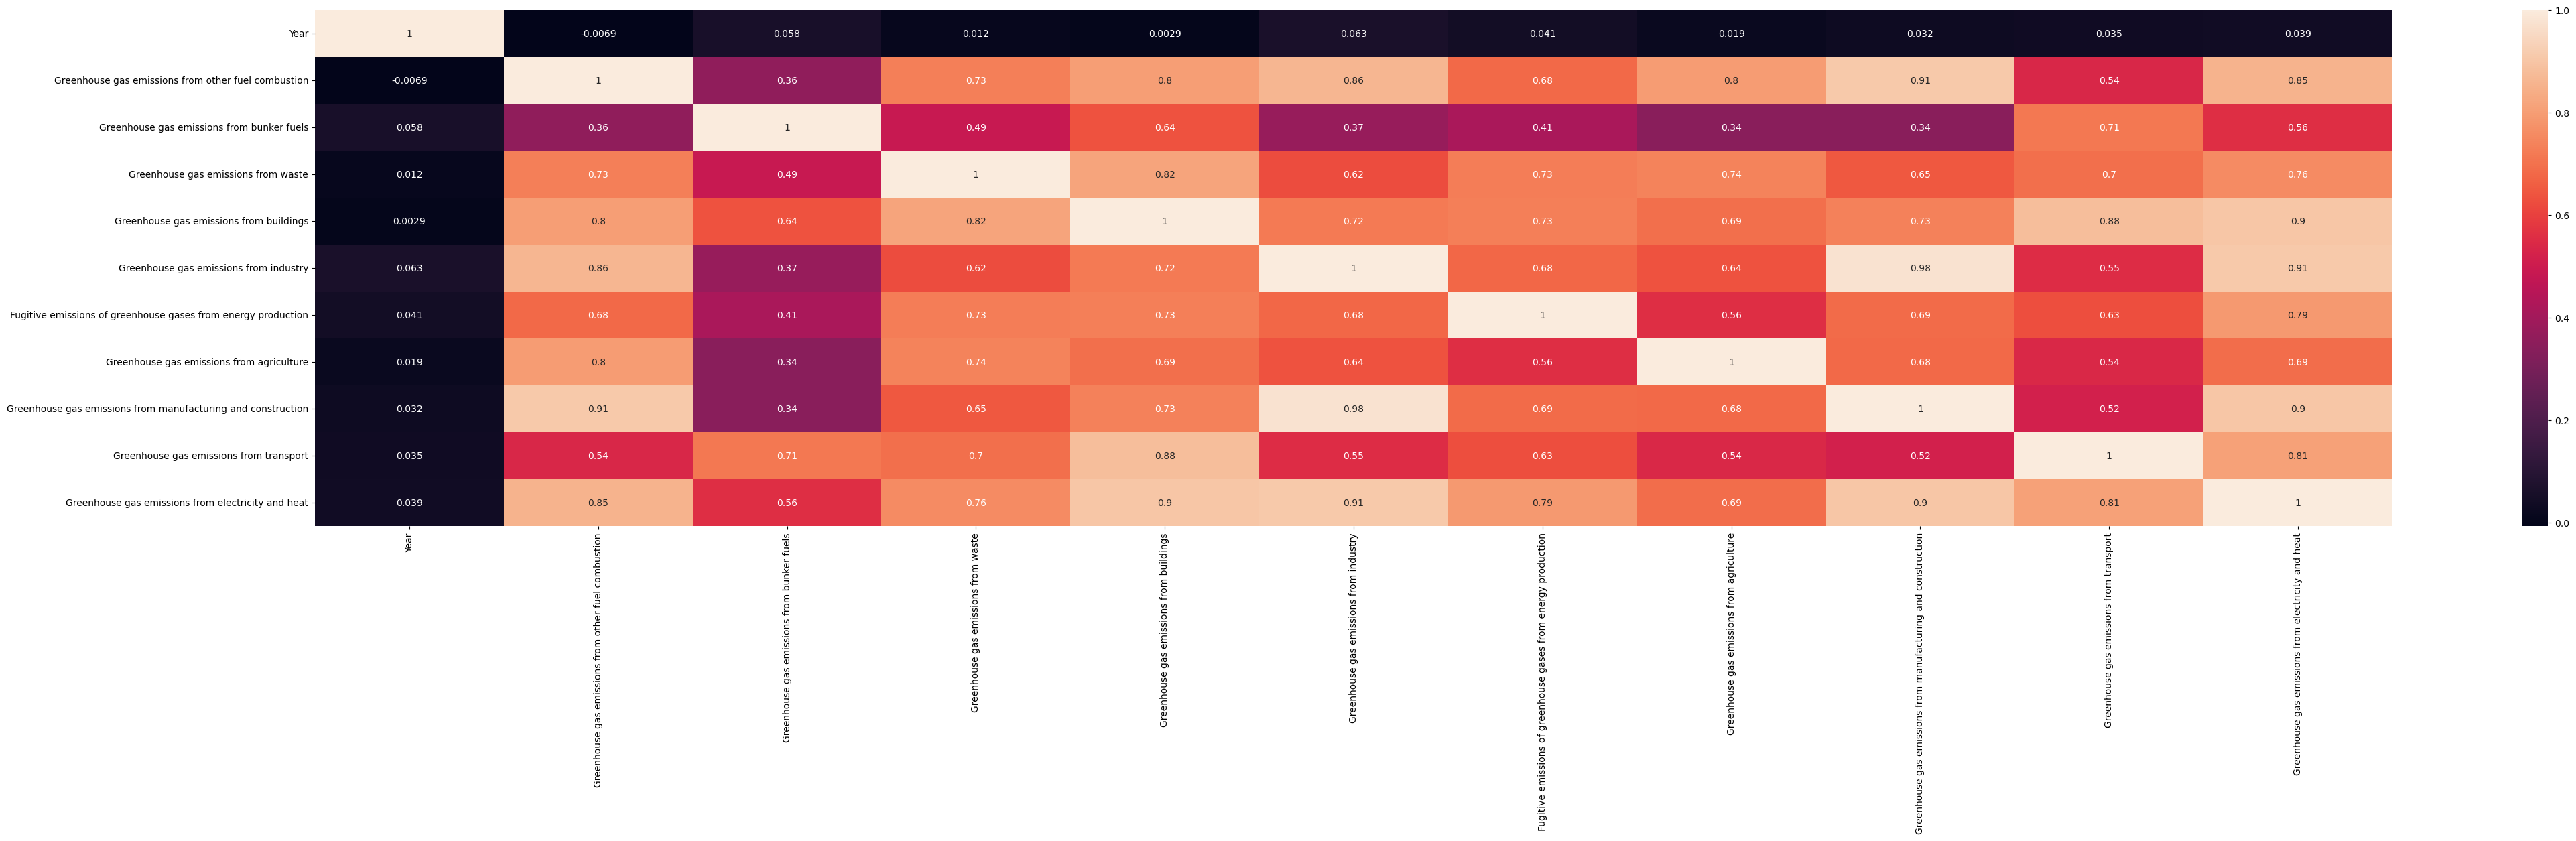

In [93]:
#Here we can see the correlation plot with heatmap to see the relationships between the variables

sns.heatmap(df2_filtered.corr(numeric_only = True), annot = True)  #here you say you want a heatmap of correlations with annotations

plt.rcParams['figure.figsize'] = (50,10) #here you adjust the size of the plot

plt.show()

In [244]:
#Now let's see the data of the especific countries that we selected before

v_countries #This is the list

df2_grouped = df2_filtered.groupby(['Year', 'Entity']).mean().reset_index()

df2_v = df2_grouped[df2_grouped['Entity'].isin(v_countries)]

df2_v

,Year,Entity,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
35,1990,China,144330000.00,5700000.00,194710000.00,484960000.00,94350000.00,154460000.00,590760000.00,750240000.00,96280000.00,728780000.00
66,1990,Germany,16440001.00,21450000.00,38310000.00,202070000.00,46450000.00,4730000.00,88200000.00,156780000.00,163210000.00,413560000.00
86,1990,Japan,18340000.00,31640000.00,14630000.00,120820000.00,73300000.00,4410000.00,29330000.00,263549980.00,217340000.00,440149980.00
143,1990,Russia,95240000.00,32849998.00,81120000.00,295890020.00,57340000.00,406829980.00,240970000.00,251950000.00,305910000.00,1235010000.00
184,1990,United States,69050000.00,132080000.00,199340000.00,547890000.00,164710000.00,271090000.00,356320000.00,606900030.00,1468599900.00,2171629800.00
188,1990,Venezuela,20000.00,3600000.00,6060000.00,5150000.00,9220000.00,150120000.00,31400000.00,23580000.00,29440000.00,36530000.00
228,1991,China,148760000.00,7330000.00,199460000.00,483840000.00,112600000.00,155350000.00,601010000.00,784090050.00,103060000.00,798080000.00
259,1991,Germany,18350000.00,19500000.00,39660000.00,198950000.00,44900000.00,6020000.00,83180000.00,134080000.00,166150000.00,411109980.00
279,1991,Japan,18760000.00,33390000.00,14490000.00,122660000.00,76990000.00,4570000.00,29020000.00,262079980.00,227930000.00,440810000.00
336,1991,Russia,90700000.00,23260000.00,81550000.00,283220000.00,56620000.00,382840000.00,232480000.00,216590000.00,299930000.00,1265210000.00


In [106]:
#And just for fun we can see the specific case of Venezuela

df2_ven = df2[df2['Entity'].str.contains('Venezuela')]
df2_ven.describe()

,Year,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00
mean,2005.00,219032.26,2922903.23,8677419.35,5562903.23,9379354.84,189823225.81,36417742.06,25483871.03,40058709.61,53630000.06
std,9.09,299870.58,1458719.06,1627619.87,1448008.27,1680610.87,34729664.11,3153851.13,7341756.75,9054153.33,12492427.17
min,1990.00,0.00,400000.00,6060000.00,2340000.00,6270000.00,77030000.00,31400000.00,8400000.00,24140000.00,20330000.00
25%,1997.50,0.00,1545000.00,7345000.00,4910000.00,8010000.25,169700000.00,33229999.00,20520000.00,33700001.00,44055000.00
50%,2005.00,150000.00,3030000.00,8460000.00,5550000.00,9220000.00,200260000.00,37490000.00,25850000.00,35940000.00,58710000.00
75%,2012.50,395000.00,3940000.00,10160000.00,6210000.00,11050000.00,213165000.00,39130000.00,31325000.00,48490000.00,63120000.00
max,2020.00,1350000.00,5810000.00,11150000.00,10930000.00,11860000.00,226690000.00,40820000.00,36460000.00,57210000.00,69980000.00


In [122]:
#df2_ven = df2_ven.set_index('Year')
df2_ven

,Entity,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
Year,,,,,,,,,,,
1990,Venezuela,20000.00,3600000.00,6060000.00,5150000.00,9220000.00,150120000.00,31400000.00,23580000.00,29440000.00,36530000.00
1991,Venezuela,10000.00,4220000.00,6230000.00,4200000.00,9350000.00,165590000.00,32320000.00,25140000.00,31190000.00,32990002.00
1992,Venezuela,170000.00,3960000.00,6410000.00,5310000.00,9100000.00,165540000.00,32380002.00,22810000.00,30710000.00,36720000.00
1993,Venezuela,330000.00,3940000.00,6580000.00,4940000.00,8850000.00,167990000.00,31740000.00,25850000.00,32919998.00,37410000.00
1994,Venezuela,470000.00,3520000.00,6750000.00,4310000.00,8520000.00,171410000.00,32710000.00,25960000.00,33419998.00,37900000.00
1995,Venezuela,550000.00,3370000.00,6920000.00,4880000.00,8490000.00,192100000.00,33029998.00,28200000.00,34540000.00,39230000.00
1996,Venezuela,180000.00,3270000.00,7090000.00,5290000.00,8149999.50,212520000.00,32470002.00,30880000.00,35920000.00,43160000.00
1997,Venezuela,200000.00,3030000.00,7260000.00,4500000.00,8140000.50,226690000.00,32830002.00,32290000.00,33470002.00,49650000.00
1998,Venezuela,190000.00,2580000.00,7430000.00,4490000.00,7880000.00,224590000.00,33430000.00,31770000.00,34270000.00,50300000.00


<Axes: title={'center': 'Venezuela Greenhouse Gas'}, xlabel='Date', ylabel='Quantity'>

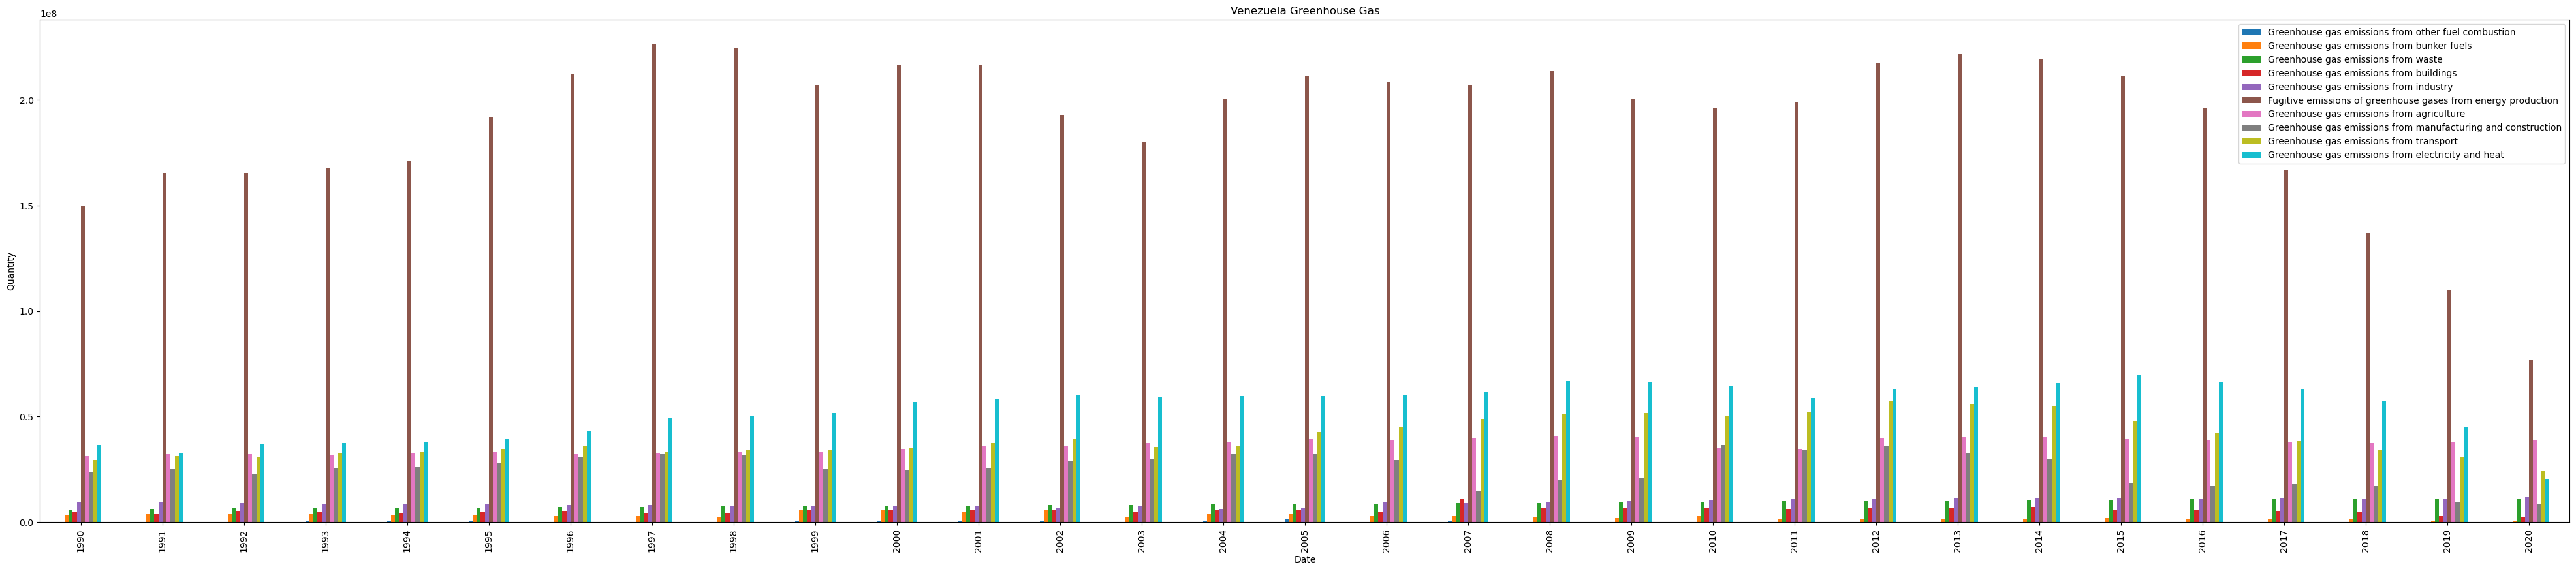

In [128]:
df2_ven.plot(kind = 'bar',  title = 'Venezuela Greenhouse Gas', xlabel = 'Date', ylabel = 'Quantity')

<Axes: title={'center': 'Venezuela Greenhouse Gas from energy production'}, xlabel='Date', ylabel='Quantity'>

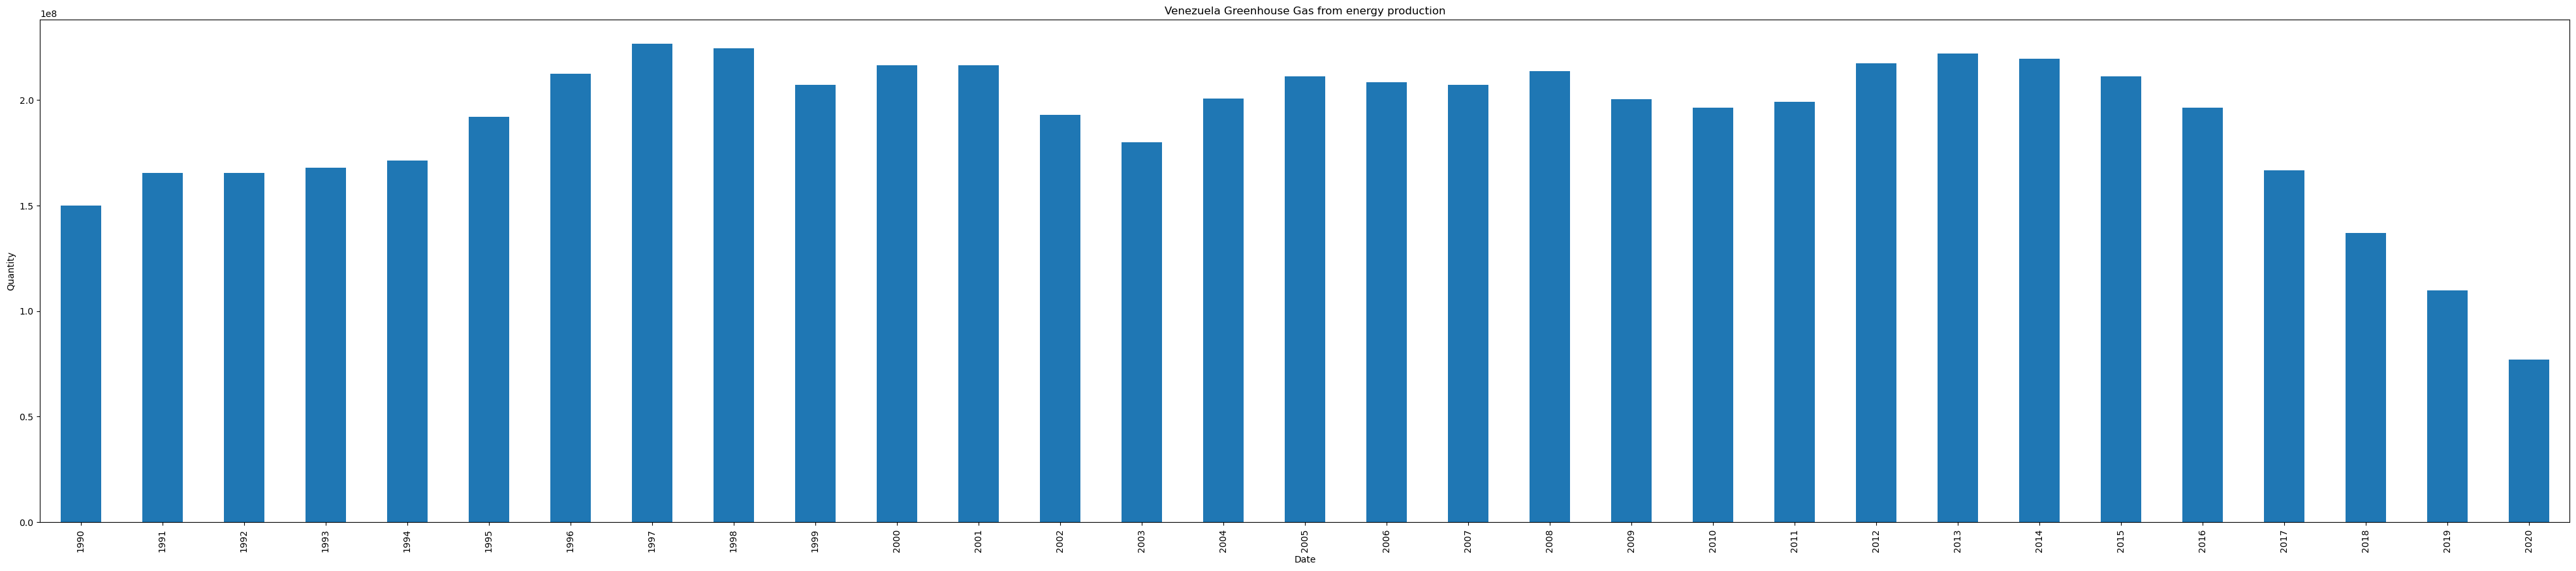

In [132]:
#And we can be more specific

df2_ven['Fugitive emissions of greenhouse gases from energy production'].plot(kind = 'bar',  title = 'Venezuela Greenhouse Gas from energy production', xlabel = 'Date', ylabel = 'Quantity')

<Axes: >

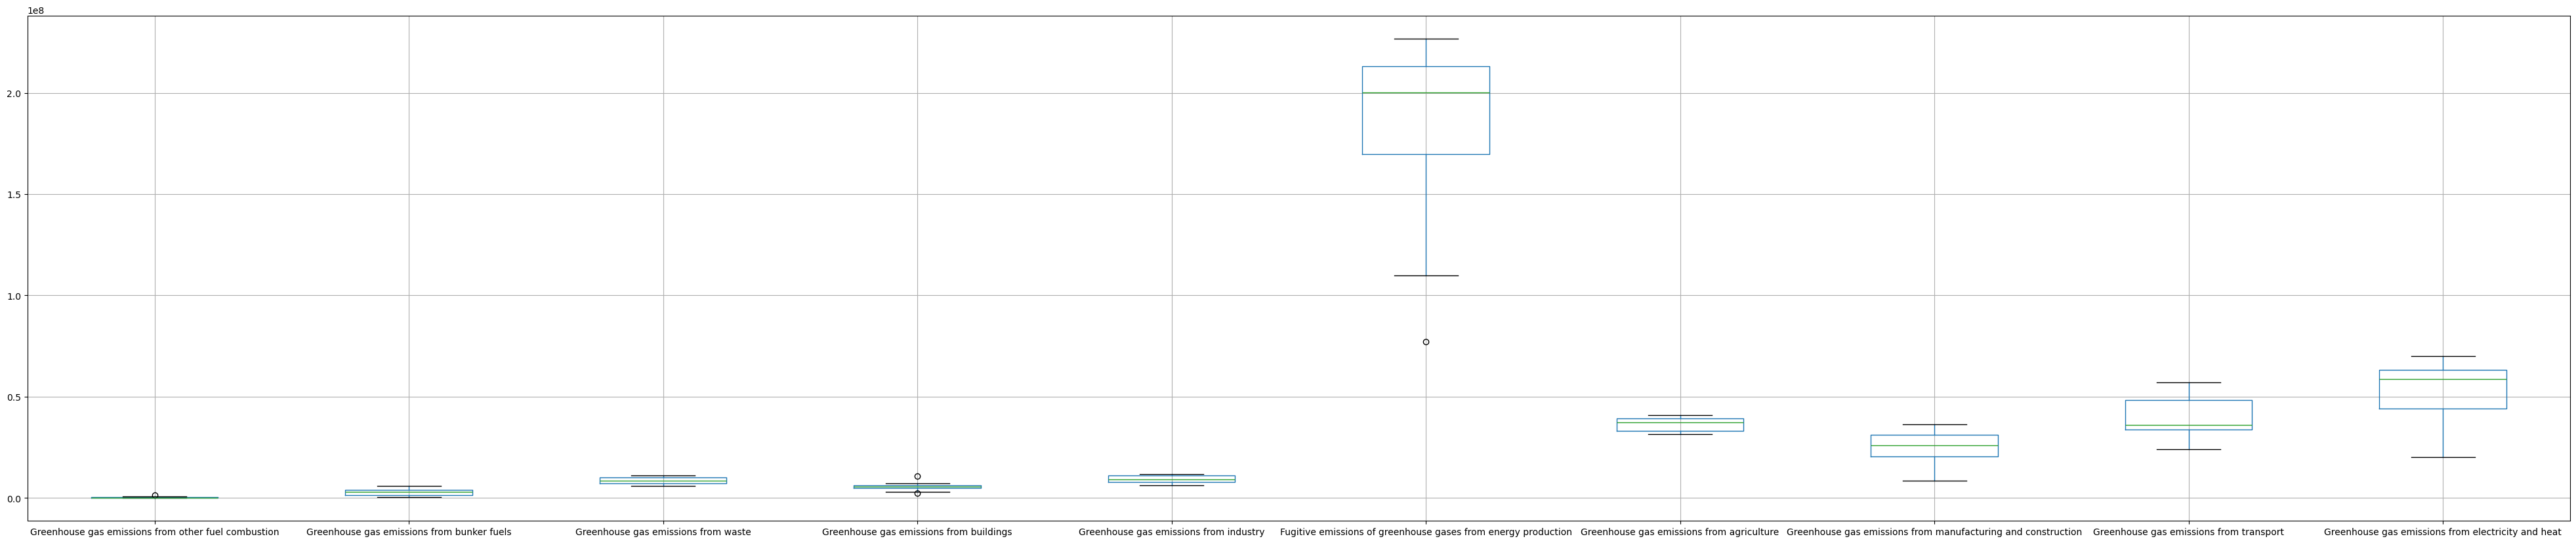

In [246]:
#The Fugitive emissions of greenhouse gases from energy production on Venezuela has the most variation on the data
#Compared with the other columns of data

df2_ven.boxplot()

<Axes: xlabel='Greenhouse gas emissions from electricity and heat', ylabel='Greenhouse gas emissions from manufacturing and construction'>

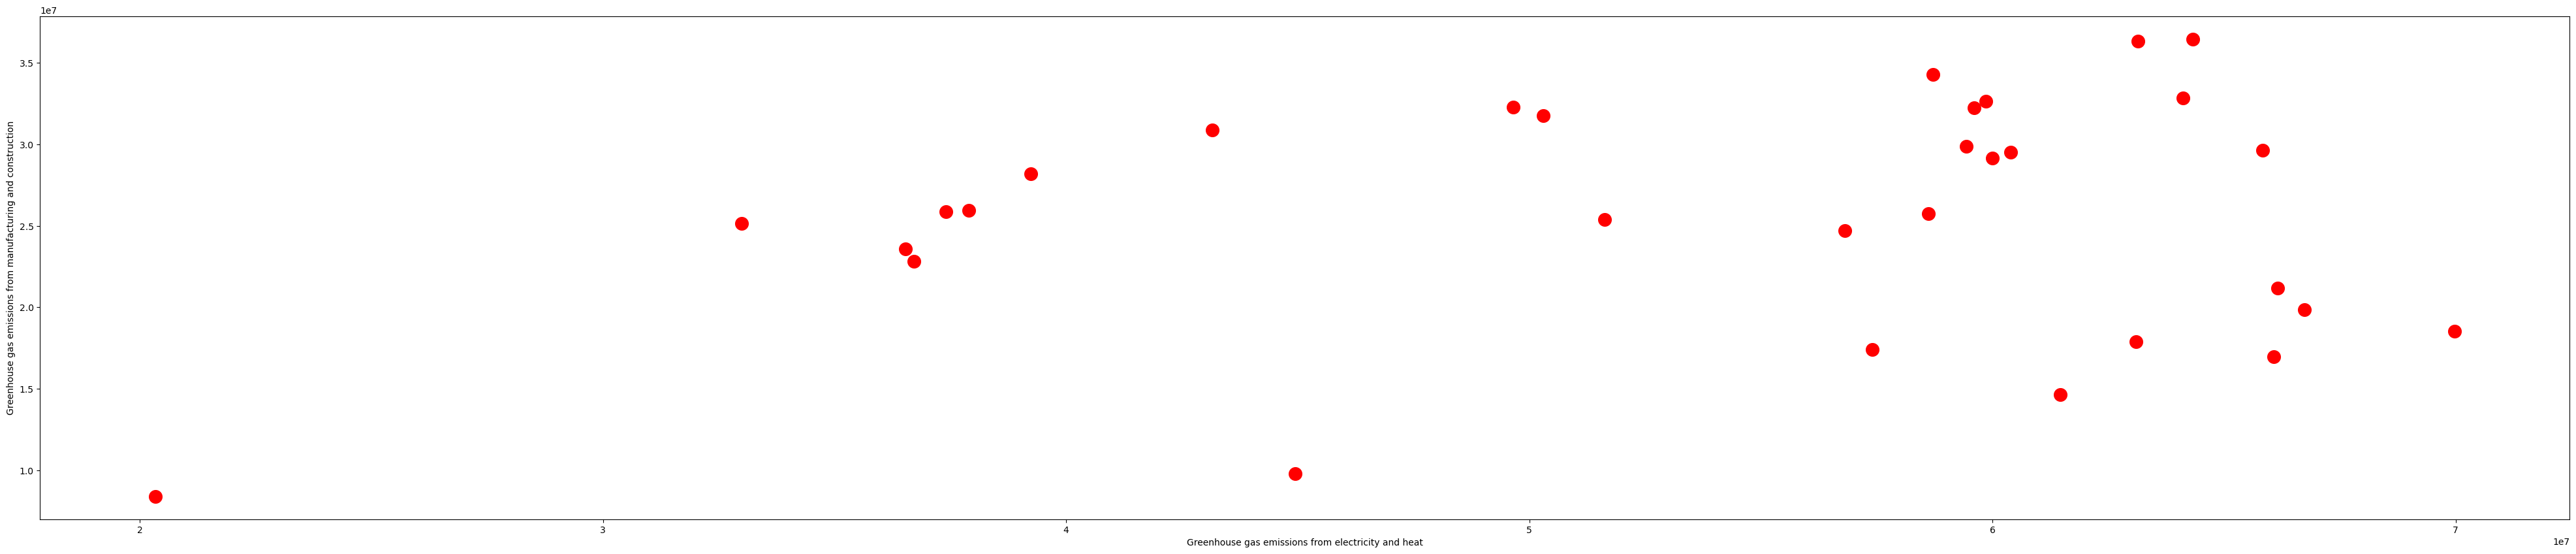

In [148]:
#Here we can see some relationship between this two variables

df2_ven.plot.scatter(x = 'Greenhouse gas emissions from electricity and heat', y = 'Greenhouse gas emissions from manufacturing and construction', s = 200, c = 'Red')

In [248]:
#Now Let's try to make joins between the df_v and df2_v

df_v

,Year,Entity,Annual CO₂ emissions
601,1792,Germany,468992.00
617,1793,Germany,479984.00
633,1794,Germany,443344.00
649,1795,Germany,447008.00
665,1796,Germany,534944.00
681,1797,Germany,549600.00
697,1798,Germany,575248.00
713,1799,Germany,626544.00
729,1800,Germany,795088.00
740,1800,United States,252815.98


In [180]:
df2_v

,Year,Entity,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
35,1990,China,144330000.00,5700000.00,194710000.00,484960000.00,94350000.00,154460000.00,590760000.00,750240000.00,96280000.00,728780000.00
66,1990,Germany,16440001.00,21450000.00,38310000.00,202070000.00,46450000.00,4730000.00,88200000.00,156780000.00,163210000.00,413560000.00
86,1990,Japan,18340000.00,31640000.00,14630000.00,120820000.00,73300000.00,4410000.00,29330000.00,263549980.00,217340000.00,440149980.00
143,1990,Russia,95240000.00,32849998.00,81120000.00,295890020.00,57340000.00,406829980.00,240970000.00,251950000.00,305910000.00,1235010000.00
184,1990,United States,69050000.00,132080000.00,199340000.00,547890000.00,164710000.00,271090000.00,356320000.00,606900030.00,1468599900.00,2171629800.00
188,1990,Venezuela,20000.00,3600000.00,6060000.00,5150000.00,9220000.00,150120000.00,31400000.00,23580000.00,29440000.00,36530000.00
228,1991,China,148760000.00,7330000.00,199460000.00,483840000.00,112600000.00,155350000.00,601010000.00,784090050.00,103060000.00,798080000.00
259,1991,Germany,18350000.00,19500000.00,39660000.00,198950000.00,44900000.00,6020000.00,83180000.00,134080000.00,166150000.00,411109980.00
279,1991,Japan,18760000.00,33390000.00,14490000.00,122660000.00,76990000.00,4570000.00,29020000.00,262079980.00,227930000.00,440810000.00
336,1991,Russia,90700000.00,23260000.00,81550000.00,283220000.00,56620000.00,382840000.00,232480000.00,216590000.00,299930000.00,1265210000.00


In [252]:
#Her we are joining with an inner join considerating as common factors the year and the entity(countries)
#Getting a new table with all the data that we need for visualizations in other programs like Tableau or Power BI

df_joined = df_v.merge(df2_v, how = 'inner', on = ['Year','Entity'])
df_joined

,Year,Entity,Annual CO₂ emissions,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat
0,1990,China,2484854800.00,144330000.00,5700000.00,194710000.00,484960000.00,94350000.00,154460000.00,590760000.00,750240000.00,96280000.00,728780000.00
1,1990,Germany,1054740600.00,16440001.00,21450000.00,38310000.00,202070000.00,46450000.00,4730000.00,88200000.00,156780000.00,163210000.00,413560000.00
2,1990,Japan,1157195500.00,18340000.00,31640000.00,14630000.00,120820000.00,73300000.00,4410000.00,29330000.00,263549980.00,217340000.00,440149980.00
3,1990,Russia,2536247800.00,95240000.00,32849998.00,81120000.00,295890020.00,57340000.00,406829980.00,240970000.00,251950000.00,305910000.00,1235010000.00
4,1990,United States,5120957000.00,69050000.00,132080000.00,199340000.00,547890000.00,164710000.00,271090000.00,356320000.00,606900030.00,1468599900.00,2171629800.00
5,1990,Venezuela,121823040.00,20000.00,3600000.00,6060000.00,5150000.00,9220000.00,150120000.00,31400000.00,23580000.00,29440000.00,36530000.00
6,1991,China,2606096100.00,148760000.00,7330000.00,199460000.00,483840000.00,112600000.00,155350000.00,601010000.00,784090050.00,103060000.00,798080000.00
7,1991,Germany,1016870300.00,18350000.00,19500000.00,39660000.00,198950000.00,44900000.00,6020000.00,83180000.00,134080000.00,166150000.00,411109980.00
8,1991,Japan,1168897300.00,18760000.00,33390000.00,14490000.00,122660000.00,76990000.00,4570000.00,29020000.00,262079980.00,227930000.00,440810000.00
9,1991,Russia,2406755600.00,90700000.00,23260000.00,81550000.00,283220000.00,56620000.00,382840000.00,232480000.00,216590000.00,299930000.00,1265210000.00
